# Basic passive models

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Maxwell Model

$$F = F_k=F_b$$

$$x = x_k+x_b$$

$$\dot x = \dot x_k + \dot x_b$$

$$F_k = kx_k \rightarrow \dot x_k = \frac{\dot F_k}{k} = \frac{\dot F}{k}$$

$$F_b = b\dot x_b \rightarrow \dot x_b = \frac{F_b}{b} = \frac{F}{b}$$

$$\dot x = \frac{\dot F}{k} + \frac{F}{b}$$

$$\dot F =   - \frac{kF}{b} + k\dot x$$

### Length step



$$\dot{x_1} = -\frac{kx_1}{b} + x$$

$$F = -\frac{k^2x_1}{b} + kx$$

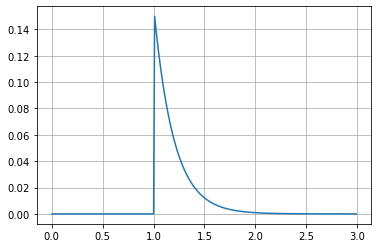

In [58]:
x = 0.3
dt = 0.01

k = 0.5
b = 0.1

t = np.arange(0, 3,dt)
F = np.zeros_like(t)
x1 = 0

for i in range(len(t)):
    if t[i]>1:
        x = 0.3
    else:
        x = 0
    x1dot = -k*x1/b + x
    x1 = x1 + dt*x1dot # Euler method
    F[i] = k*x1dot
    
plt.figure()
plt.plot(t, F)
plt.grid()
plt.show()

### Sinusoidal length

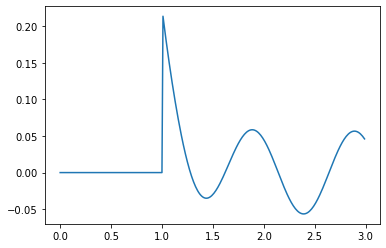

In [55]:
dt = 0.01

k = 0.5
b = 0.1

t = np.arange(0, 3,dt)
F = np.zeros_like(t)


x1 = 0

for i in range(len(t)):
    if t[i] > 1:
        x = 0.3 + 0.15*np.cos(2*np.pi*t[i])
    else:
        x = 0
    x1dot = -k*x1/b + x
    x1 = x1 + dt*x1dot # Euler method
    F[i] = -k**2*x1/b + k*x
    
plt.figure()
plt.plot(t, F)
plt.show()

## Voight Model

$$F = F_k+F_b$$

$$x = x_k=x_b$$

$$F_k = kx_k \rightarrow F_k = kx$$

$$F_b = b\dot x_b \rightarrow F_b = b\dot x$$

$$F = kx+b\dot x$$

$$\dot x =   - \frac{kx}{b} + \frac{F}{b}$$





$$\dot x_1 = -\frac{kx_1}{b} + \frac{F}{b}$$

$$x = x_1$$

### Constant force



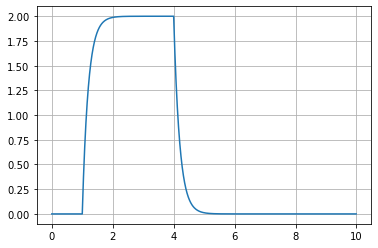

In [54]:
dt = 0.01

k = 0.5
b = 0.1

t = np.arange(0, 10, dt)
x = np.zeros_like(t)
x1 = 0

for i in range(len(t)):
    if 0<t[i]<=1:
        F = 0
    elif 1<t[i]<=4:
        F = 1
    else:
        F = 0
    x1dot = -k/b*x1 + F/b
    x1 = x1 + dt*x1dot # Euler method
    x[i] = x1
    
plt.figure()
plt.plot(t, x)
plt.grid()
plt.show()

### Sinusoidal force

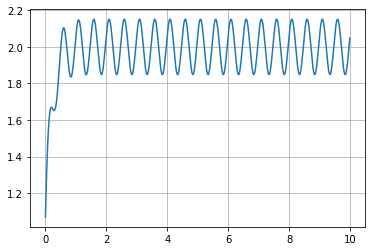

In [59]:

dt = 0.01

k = 0.5
b = 0.1

t = np.arange(0, 10,dt)
F = 1 + 0.2*np.cos(2*np.pi*2*t)
x = np.zeros_like(t)
x1 = 1

for i in range(len(t)):
    x1dot = -k/b*x1 + F[i]/b
    x1 = x1 + dt*x1dot # Euler method
    x[i] = x1
    
plt.figure()
plt.plot(t, x)
plt.grid()
plt.show()

## Kelvin Model

$$F = F_1+F_2$$

$$F_1 = F_{k_s} = F_b $$

$$F_2 = F_{k_p}$$

$$ x = x_s + x_b$$

$$ \dot x = \dot x_s + \dot x_b$$

$$ F_{k_s} = k_sx_s \rightarrow \dot F_{k_s} = k_s\dot x_s \rightarrow \dot x_s = \frac{\dot F_{k_s}}{k_s}$$

$$ F_{b} = b\dot x_b \rightarrow \dot x_b = \frac{F_{b}}{b}$$

$$F_{k_p} = $$

$$ \dot x = \frac{\dot F_{1}}{k_s} + \frac{F_{1}}{b}$$

$$ \dot F_{1} = - \frac{k_sF_{1}}{b} + k_s\dot x$$






### Length step



$$\dot x_1 =  - \frac{k_sx_{1}}{b} + x$$

$$F_1 =  - \frac{k_s^2x_{1}}{b} + k_sx$$

$$F = F_1+k_px$$

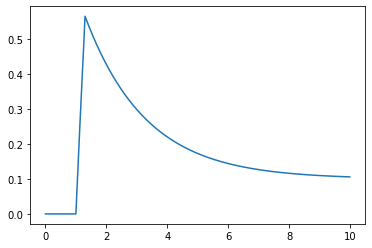

In [11]:
x = 0.3
dt = 0.01

ks = 0.5
kp = 0.1
b = 1

t = np.arange(0, 10, dt)
F = np.zeros_like(t)
x1 = 0

for i in range(len(t)):
    if 1< t[i]<1.3:
        x = 3.3*(t[i]-1)
    elif t[i] >= 1.3:
        x = 1
    else:
        x = 0
    x1dot = -ks*x1/b + x
    x1 = x1 + dt*x1dot # Euler method
    F[i] = ks*x1dot + kp*x
    
plt.figure()
plt.plot(t, F)
plt.show()

### Force step

$$\dot x = \frac{\dot F - k_p\dot x}{k_s} + \frac{F - k_px}{b} $$

$$\dot x\left(\frac{k_s+k_p}{k_s} \right) = \frac{\dot F}{k_s} + \frac{F - k_px}{b} $$

$$\dot x = \frac{\dot F}{k_s+k_p} + \frac{k_sF}{b(k_s+k_p)} - \frac{k_sk_px}{b(k_s+k_p)} $$

$$ \dot x_1 = F - \frac{k_sk_px}{b(k_s+k_p)}$$

$$x = \frac{\dot x_1}{k_s+k_p} + \frac{k_sx_1}{b(k_s+k_p)} $$

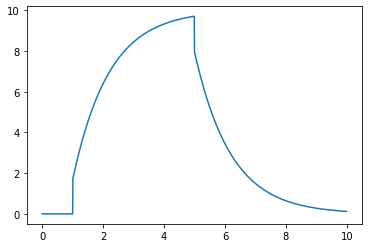

In [44]:
dt = 0.01

ks = 0.5
kp = 0.1
b = 0.1

t = np.arange(0, 10, dt)
x = np.zeros_like(t)
x1 = 0

for i in range(len(t)):
    if 0<t[i]<1:
        F = 0
    elif 1<t[i]<5:
        F = 1
    else:
        F = 0
    x1dot = -ks*kp/(ks+kp)/b*x1 + F
    x1 = x1 + dt*x1dot
    x[i] = ks/(b*(ks+kp))*x1 + x1dot/(ks+kp)
    
plt.figure()
plt.plot(t, x)
plt.show()

## References

- Yamaguchi, GT, DYNAMIC MODELING OF MUSCULOSKELETAL MOTION A Vectorized Approach
for Biomechanical Analysis in Three Dimensions, 2001